In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
from ipywidgets import interact,widgets,fixed
from IPython.display import display
import matplotlib as mpl
mpl.rc('font', family='Noto Sans CJK TC')

## 製作台北與新北圖層

#### 一開始想用台北與新北的shp使用union功能把兩塊拼起來，但拼起來後如下圖會有奇怪的空隙
#### 因此改而使用geopandas的功能，從全台的shp中選出新北與台北來進行顯示

In [3]:
tp = gpd.read_file('G97_A_CADIST_P.shp',encoding = 'big5')
tp.crs = {'init' :'epsg:3826'}
tp.head()

AREA  PERF_ID  COUN_ID   CPID    CPTID     NPID      NPTID PNAME  \
0  5.738380e+07  63012.0  6301200  63012  6301200  63012.0  6301200.0   臺北市   
1  6.110781e+07  63011.0  6301100  63011  6301100  63011.0  6301100.0   臺北市   
2  3.195183e+07  63010.0  6301000  63010  6301000  63010.0  6301000.0   臺北市   
3  1.382460e+07  63004.0  6300400  63004  6300400  63004.0  6300400.0   臺北市   
4  4.790129e+06  63006.0  6300600  63006  6300600  63006.0  6300600.0   臺北市   

  TNAME  PTNAME    TM2_MAX_X     TM2_MAX_Y    TM2_MIN_X     TM2_MIN_Y  \
0   北投區  臺北市北投區  307802.1700  2.789176e+06  296266.0530  2.776476e+06   
1   士林區  臺北市士林區  311328.6318  2.787546e+06  296551.1512  2.774091e+06   
2   內湖區  臺北市內湖區  313380.3449  2.778643e+06  305676.8954  2.771635e+06   
3   中山區  臺北市中山區  307730.5324  2.776082e+06  302363.0968  2.770843e+06   
4   大同區  臺北市大同區  302761.2987  2.774825e+06  300900.7738  2.771202e+06   

       MAX_X     MAX_Y      MIN_X     MIN_Y  \
0  121.57361  25.21014  121.45871  25.09588   
1  121.60853  25.19528  121.46145  25.07434   
2  121.62848  25.11483  121.55181  25.05186   
3  121.57235  25.09193  121.51894  25.04483   
4  121.52304  25.08076  121.50446  25.04812   

                                            geometry  
0  POLYGON ((302675.6676993757 2785251.545594117,...  
1  POLYGON ((307802.1699872206 2787372.759674619,...  
2  POLYGON ((310064.6396263964 2778552.346185653,...  
3  POLYGON ((305676.8954070802 2776082.190999218,...  
4  POLYGON ((300900.7737859354 2774524.919405477,...

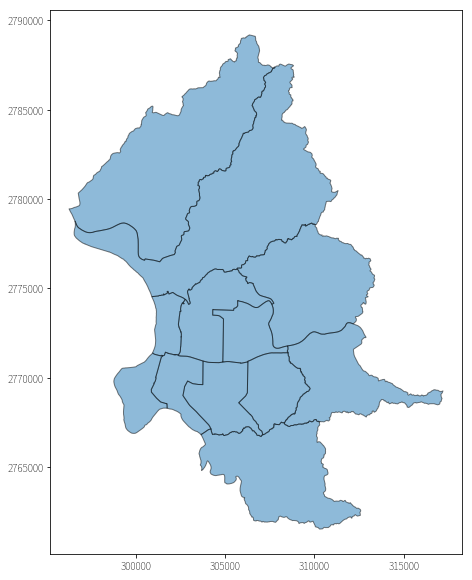

In [4]:
tp.plot(figsize= (10,10),alpha=0.5,edgecolor = "K")

In [5]:
ntp = gpd.read_file('新北市行政區域圖\行政區域圖.shp',encoding = 'utf-8')
ntp.crs= {'init' :'epsg:3826'}
ntp

AREA ADMIT ADMIT_ID          TM2X          TM2Y         MAX_X  \
0   4.210383e+07   八里區       23  291700.07830  2.779907e+06  296481.96902   
1   6.636898e+07   三芝區       21  301033.90622  2.791376e+06  307033.68747   
2   1.806343e+07   三重區       02  299040.81246  2.773243e+06  301152.90635   
3   1.896720e+08   三峽區       09  291158.87509  2.751566e+06  300241.96876   
4   2.991187e+07   土城區       13  294902.37510  2.762080e+06  298647.96885   
5   1.916816e+07   中和區       03  300188.03106  2.764722e+06  303517.78098   
6   3.119942e+07   五股區       15  293922.50008  2.776540e+06  297506.40649   
7   7.115855e+07   平溪區       24  326589.46866  2.768836e+06  332427.12507   
8   6.162251e+06   永和區       04  301814.35944  2.766712e+06  303766.34373   
9   5.192398e+07   石門區       22  306804.73419  2.794395e+06  312478.78102   
10  1.418392e+08   石碇區       19  315291.17171  2.760363e+06  323372.28113   
11  7.176965e+07   汐止區       11  316859.02927  2.775210e+06  323663.96509   
12  1.682680e+08   坪林區       20  322658.50009  2.756253e+06  330171.15633   
13  5.370282e+07   林口區       17  285186.95331  2.776887e+06  291866.62513   
14  2.153380e+07   板橋區       01  296123.89063  2.766513e+06  299404.68760   
15  4.723495e+07   金山區       27  311100.10940  2.790176e+06  315807.09369   
16  1.805370e+07   泰山區       16  291622.51588  2.771681e+06  295213.12529   
17  3.334386e+08   烏來區       29  307160.46859  2.741896e+06  321515.34348   
18  9.877872e+07   貢寮區       26  342100.37564  2.770615e+06  351614.37489   
19  7.201136e+07   淡水區       10  296751.23425  2.786198e+06  302671.43733   
20  2.103275e+07   深坑區       18  312652.20310  2.765638e+06  315184.06232   
21  1.211906e+08   新店區       06  303920.85933  2.757940e+06  311653.18735   
22  2.069462e+07   新莊區       05  293355.64064  2.769397e+06  297291.03121   
23  7.167006e+07   瑞芳區       12  334441.06256  2.775891e+06  343245.06275   
24  6.317618e+07   萬里區       28  315415.93758  2.785468e+06  321415.25008   
25  3.178626e+07   樹林區       07  290049.17195  2.763778e+06  293608.96889   
26  1.460970e+08   雙溪區       25  333814.24994  2.765866e+06  340541.31246   
27  7.720043e+06   蘆洲區       14  297695.84380  2.775584e+06  299537.18746   
28  2.189212e+07   鶯歌區       08  285245.12500  2.760853e+06  288599.78140   

           MAX_Y         MIN_X         MIN_Y    PID     PTID PNAME PTNAME  \
0   2.785137e+06  286918.18758  2.774677e+06  65000  6500023   新北市    八里區   
1   2.797030e+06  295034.12497  2.785722e+06  65000  6500021   新北市    三芝區   
2   2.776363e+06  296928.71857  2.770122e+06  65000  6500002   新北市    三重區   
3   2.760536e+06  282075.78142  2.742596e+06  65000  6500009   新北市    三峽區   
4   2.765450e+06  291156.78134  2.758710e+06  65000  6500013   新北市    土城區   
5   2.767644e+06  296858.28114  2.761799e+06  65000  6500003   新北市    中和區   
6   2.780492e+06  290338.59366  2.772587e+06  65000  6500015   新北市    五股區   
7   2.774583e+06  320751.81225  2.763089e+06  65000  6500024   新北市    平溪區   
8   2.768292e+06  299862.37514  2.765133e+06  65000  6500004   新北市    永和區   
9   2.799082e+06  301130.68737  2.789709e+06  65000  6500022   新北市    石門區   
10  2.770594e+06  307210.06229  2.750133e+06  65000  6500019   新北市    石碇區   
11  2.781439e+06  310054.09345  2.768980e+06  65000  6500011   新北市    汐止區   
12  2.764391e+06  315145.84385  2.748115e+06  65000  6500020   新北市    坪林區   
13  2.781010e+06  278507.28149  2.772764e+06  65000  6500017   新北市    林口區   
14  2.770272e+06  292843.09366  2.762754e+06  65000  6500001   新北市    板橋區   
15  2.796395e+06  306393.12511  2.783957e+06  65000  6500027   新北市    金山區   
16  2.774332e+06  288031.90647  2.769029e+06  65000  6500016   新北市    泰山區   
17  2.754123e+06  292805.59369  2.729668e+06  65000  6500029   新北市    烏來區   
18  2.779521e+06  336899.31260  2.761708e+06  65000  6500026   新北市    貢寮區   
19  2.792921e+06  290831.03117  2.779475e+06  65000  6500010   新北市    淡水區   
20  2.768763e+06  310120.34388  2.762513e+06  65000  6500018   新北市    深坑區   
21  2.7

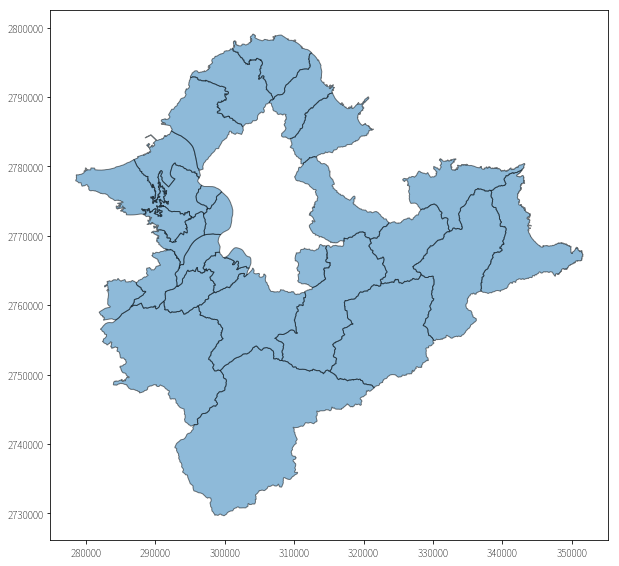

In [6]:
ntp.plot(figsize= (10,10),alpha=0.5,edgecolor = "K")

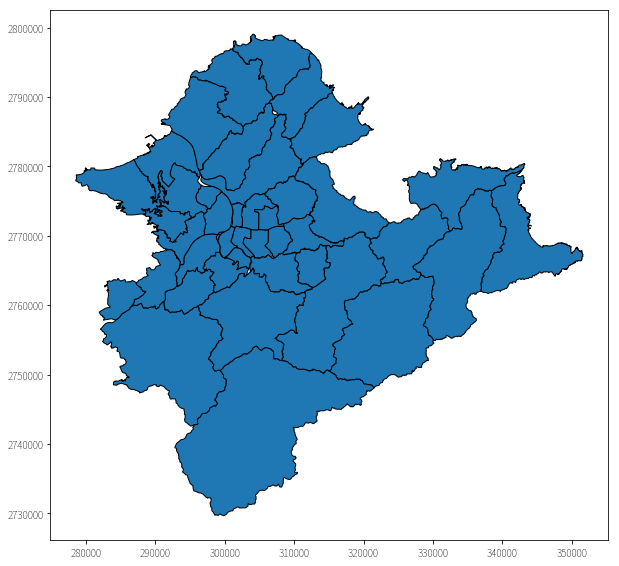

In [7]:
union = gpd.overlay(tp,ntp,how='union')
union.plot(figsize= (10,10),edgecolor = "k")
#試試看從台灣全島選出台北新北

# `正式開始`

### `首先用geopandas讀入台灣shp`

如果不喜歡用geopandas，也可以有用pandas的方法

補充:
[從Pandas到Geopandas的幾種方法](https://ithelp.ithome.com.tw/articles/10202839?sc=iThelpR)

In [8]:
TW = gpd.read_file('台灣TWD97鄉鎮市\TOWN_MOI_1071226.shp',encoding = 'utf-8')
TW.head()

TOWNID  TOWNCODE COUNTYNAME TOWNNAME             TOWNENG COUNTYID  \
0    V02  10014020        臺東縣      成功鎮  Chenggong Township        V   
1    T21  10013210        屏東縣      佳冬鄉    Jiadong Township        T   
2    P13  10009130        雲林縣      麥寮鄉    Mailiao Township        P   
3    V11  10014110        臺東縣      綠島鄉      Lvdao Township        V   
4    V16  10014160        臺東縣      蘭嶼鄉      Lanyu Township        V   

  COUNTYCODE                                           geometry  
0      10014  POLYGON ((121.409815737 23.21369278500009, 121...  
1      10013  POLYGON ((120.5484580210001 22.46067220300006,...  
2      10009  POLYGON ((120.3019750420001 23.81624614400005,...  
3      10014  (POLYGON ((121.491547243 22.67745703900005, 12...  
4      10014  (POLYGON ((121.6117956420001 21.94289657000007...

### `讀入村里學歷資料`

這邊先在Excel篩選了一些資料，其實可以用pandas完成，此手法較為卑劣一點

稍微整理一下表格

* 改column名稱
* 改index

In [9]:
df = pd.read_excel('村里學歷人數改.xlsx',encoding = 'utf-8')
colnames = df.loc[0].values
df = df[2:]
df.columns = colnames
df.index = range(1,7760)
df.head()

統計年        區域別代碼     區域別 COUNTYNAME TOWNNAME 村里名稱 博士畢  碩士畢   大學畢  二專畢 後二專畢  \
1  107  65000010002  新北市板橋區        新北市      板橋區  流芳里  10   87   349   82   89   
2  107  65000010003  新北市板橋區        新北市      板橋區  赤松里   6   63   197   28   51   
3  107  65000010004  新北市板橋區        新北市      板橋區  黃石里   4   47   214   62   41   
4  107  65000010005  新北市板橋區        新北市      板橋區  挹秀里  20  140   446  115  122   
5  107  65000010006  新北市板橋區        新北市      板橋區  湳興里   9  262  1019  273  262   

   高中畢  高職畢  國中畢  國小畢 不識字  
1  109  182   71   90   4  
2   51   88   41   51   7  
3  102  149   75   80   5  
4  122  228   88   72   3  
5  310  845  510  490  25

## `將各區的學歷資料進行總和`

### groupby來自SQL語法，可以將資料依照自己要的column分組
這邊使用的是先判斷縣市名，再判斷鄉鎮名，兩個交換會有不一樣的結果產生

In [10]:
df2 = df.groupby(by=['COUNTYNAME','TOWNNAME']).sum()
df2.head()

統計年         區域別代碼  \
COUNTYNAME TOWNNAME                       
南投縣        中寮鄉       1926  180145440171   
           仁愛鄉       1712  160130080136   
           信義鄉       1498  140113680105   
           南投市       3638  340272340595   
           名間鄉       2461  230185380276   

                                                                   區域別  \
COUNTYNAME TOWNNAME                                                      
南投縣        中寮鄉       南投縣中寮鄉南投縣中寮鄉南投縣中寮鄉南投縣中寮鄉南投縣中寮鄉南投縣中寮鄉南投縣中寮鄉南投縣中...   
           仁愛鄉       南投縣仁愛鄉南投縣仁愛鄉南投縣仁愛鄉南投縣仁愛鄉南投縣仁愛鄉南投縣仁愛鄉南投縣仁愛鄉南投縣仁...   
           信義鄉       南投縣信義鄉南投縣信義鄉南投縣信義鄉南投縣信義鄉南投縣信義鄉南投縣信義鄉南投縣信義鄉南投縣信...   
           南投市       南投縣南投市南投縣南投市南投縣南投市南投縣南投市南投縣南投市南投縣南投市南投縣南投市南投縣南...   
           名間鄉       南投縣名間鄉南投縣名間鄉南投縣名間鄉南投縣名間鄉南投縣名間鄉南投縣名間鄉南投縣名間鄉南投縣名...   

                                                                  村里名稱  博士畢  \
COUNTYNAME TOWNNAME                                                           
南投縣        中寮鄉       廣興村崁頂村八仙村和興村福盛村永平村復興村中寮村廣福村永福村義和村清水村龍安村龍岩村永和村內...   10   
           仁愛鄉        法治村中正村互助村新生村力行村發祥村合作村親愛村大同村南豐村春陽村精英村萬豐村榮興村翠華村都達村    8   
           信義鄉              人和村地利村潭南村明德村愛國村自強村羅娜村望美村同富村神木村東埔村雙龍村新鄉村豐丘村    2   
           南投市       龍泉里康壽里三民里仁和里南投里彰仁里崇文里漳興里漳和里軍功里東山里平和里振興里千秋里三興里三...  289   
           名間鄉       南雅村中正村中山村濁水村炭寮村新民村新街村東湖村萬丹村田仔村大庄村?下村大坑村竹圍村赤水村三...   43   

                      碩士畢    大學畢   二專畢  後二專畢   高中畢    高職畢   國中畢   國小畢  不識字  
COUNTYNAME TOWNNAME                                                         
南投縣        中寮鄉        222   1406   517   339   849   2583  2412  2048  380  
           仁愛鄉        113   1107   331   391  1313   2639  1576  1864   51  
           信義鄉        126   1397   315   342   983   2284  2651  2049   76  
           南投市       4013  17210  5753  4093  5650  15410  9358  8394  791  
           名間鄉        826   4687  1713  1097  1847   6657  5117  5392  306

![名稱問題](奇怪.jpg)

#### 檔案中的鄉鎮市區分類有三民一、二與鳳山一、二，將名稱統一為區

### 再整理一下資料

In [11]:
df2.drop(['統計年','區域別代碼','區域別','村里名稱'],axis = 1,inplace = True)
df2.reset_index(inplace=True) #COUNTYNAME會凸出去
df2.head(3)

COUNTYNAME TOWNNAME  博士畢  碩士畢   大學畢  二專畢  後二專畢   高中畢   高職畢   國中畢   國小畢  不識字
0        南投縣      中寮鄉   10  222  1406  517   339   849  2583  2412  2048  380
1        南投縣      仁愛鄉    8  113  1107  331   391  1313  2639  1576  1864   51
2        南投縣      信義鄉    2  126  1397  315   342   983  2284  2651  2049   76

### 使用merge將兩個DataFrame結合在一起

#### 注意：~~在學歷統計的df2中僅有357個鄉鎮市，而TW則有368個鄉鎮市~~ ，因此在merge中加入how='left'，以TW這個dataframe為主來合併資料，並且將缺失資料填上0


### Merge功能

要使兩個dataframe合併可以使用:

* concat 甚麼都不管的直接連接兩個表格(軸方向axis,0代表縱向,1代表橫向)

* DataFrame append 根據cloumn name向下合併

* merge 根據欄位名稱合併，how是合併的方式，on可指定以哪個項目，suffixes增加欄位副屬性



#### drop去除多餘的欄位，這邊的重點是要使用``inplace = True``，才會"真的"改變dataframe

In [12]:
df3 = pd.merge(TW, df2,how='left')
df3.drop(['TOWNID','TOWNCODE','TOWNENG','COUNTYID','COUNTYCODE'],axis = 1,inplace = True)
df3.head()

COUNTYNAME TOWNNAME                                           geometry  \
0        臺東縣      成功鎮  POLYGON ((121.409815737 23.21369278500009, 121...   
1        屏東縣      佳冬鄉  POLYGON ((120.5484580210001 22.46067220300006,...   
2        雲林縣      麥寮鄉  POLYGON ((120.3019750420001 23.81624614400005,...   
3        臺東縣      綠島鄉  (POLYGON ((121.491547243 22.67745703900005, 12...   
4        臺東縣      蘭嶼鄉  (POLYGON ((121.6117956420001 21.94289657000007...   

    博士畢    碩士畢     大學畢     二專畢    後二專畢     高中畢     高職畢     國中畢     國小畢     不識字  
0   6.0  118.0  1104.0   384.0   229.0   614.0  1927.0  2206.0  3044.0   116.0  
1  18.0  307.0  2084.0   722.0   576.0   881.0  4179.0  2069.0  2672.0   481.0  
2  37.0  870.0  5620.0  1464.0  1063.0  2087.0  6636.0  5676.0  4301.0  1156.0  
3   7.0  124.0   608.0   215.0   112.0   157.0   793.0   356.0   460.0    15.0  
4   3.0   86.0   552.0   146.0    60.0   347.0   800.0   658.0   514.0    10.0

In [13]:
'''
what = df3[df3.isnull().values==True]
what=what.loc[:,'COUNTYNAME':'geometry']
what1 = pd.merge(what,df2,how='right',on=['COUNTYNAME', 'TOWNNAME'])
waht2 = pd.merge(what1,TW,how = 'right')
waht2
'''
#unhashable type

"\nwhat = df3[df3.isnull().values==True]\nwhat=what.loc[:,'COUNTYNAME':'geometry']\nwhat1 = pd.merge(what,df2,how='right',on=['COUNTYNAME', 'TOWNNAME'])\nwaht2 = pd.merge(what1,TW,how = 'right')\nwaht2\n"

### 一個鄉鎮縣市有幾個column出現NaN就印幾次，所以這邊出現了16個錯誤
### 錯誤的原因:1.Excel切資料切到四個字的鄉鎮 以及 2.重複的區名

`isnull()`可以查看資料中的NaN值

In [14]:
df3[df3.isnull().values==True]

COUNTYNAME TOWNNAME                                           geometry  \
115        嘉義縣     阿里山鄉  POLYGON ((120.813791369 23.60095162300007, 120...   
115        嘉義縣     阿里山鄉  POLYGON ((120.813791369 23.60095162300007, 120...   
115        嘉義縣     阿里山鄉  POLYGON ((120.813791369 23.60095162300007, 120...   
115        嘉義縣     阿里山鄉  POLYGON ((120.813791369 23.60095162300007, 120...   
115        嘉義縣     阿里山鄉  POLYGON ((120.813791369 23.60095162300007, 120...   
115        嘉義縣     阿里山鄉  POLYGON ((120.813791369 23.60095162300007, 120...   
115        嘉義縣     阿里山鄉  POLYGON ((120.813791369 23.60095162300007, 120...   
115        嘉義縣     阿里山鄉  POLYGON ((120.813791369 23.60095162300007, 120...   
115        嘉義縣     阿里山鄉  POLYGON ((120.813791369 23.60095162300007, 120...   
115        嘉義縣     阿里山鄉  POLYGON ((120.813791369 23.60095162300007, 120...   
130        屏東縣     三地門鄉  POLYGON ((120.774185233 22.83795549000007, 120...   
130        屏東縣     三地門鄉  POLYGON ((120.774185233 22.83795549000007, 120...   
130        屏東縣     三地門鄉  POLYGON ((120.774185233 22.83795549000007, 120...   
130        屏東縣     三地門鄉  POLYGON ((120.774185233 22.83795549000007, 120...   
130        屏東縣     三地門鄉  POLYGON ((120.774185233 22.83795549000007, 120...   
130        屏東縣     三地門鄉  POLYGON ((120.774185233 22.83795549000007, 120...   
130        屏東縣     三地門鄉  POLYGON ((120.774185233 22.83795549000007, 120...   
130        屏東縣     三地門鄉  POLYGON ((120.774185233 22.83795549000007, 120...   
130        屏東縣     三地門鄉  POLYGON ((120.774185233 22.83795549000007, 120...   
130        屏東縣     三地門鄉  POLYGON ((120.774185233 22.83795549000007, 120...   
186        臺東縣     太麻里鄉  POLYGON ((121.042394734 22.70148861200005, 121...   
186        臺東縣     太麻里鄉  POLYGON ((121.042394734 22.70148861200005, 121...   
186        臺東縣     太麻里鄉  POLYGON ((121.042394734 22.70148861200005, 121...   
186        臺東縣     太麻里鄉  POLYGON ((121.042394734 22.70148861200005, 121...   
186        臺東縣     太麻里鄉  POLYGON ((121.042394734 22.70148861200005, 121...   
186        臺東縣     太麻里鄉  POLYGON ((121.042394734 22.70148861200005, 121...   
186        臺東縣     太麻里鄉  POLYGON ((121.042394734 22.70148861200005, 121...   
186        臺東縣     太麻里鄉  POLYGON ((121.042394734 22.70148861200005, 121...   
186        臺東縣     太麻里鄉  POLYGON ((121.042394734 22.70148861200005, 121...   
186        臺東縣     太麻里鄉  POLYGON ((121.042394734 22.70148861200005, 121...   
..         ...      ...                                                ...   
294        新竹市       東區  POLYGON ((120.978841554 24.82429866600006, 120...   
294        新竹市       東區  POLYGON ((120.978841554 24.82429866600006, 120...   
294        新竹市       東區  POLYGON ((120.978841554 24.82429866600006, 120...   
294        新竹市       東區  POLYGON ((120.978841554 24.82429866600006, 120...   
294        新竹市       東區  POLYGON ((120.978841554 24.82429866600006, 120...   
294        新竹市       東區  POLYGON ((120.978841554 24.82429866600006, 120...   
294        新竹市       東區  POLYGON ((120.978841554 24.82429866600006, 120...   
294        新竹市       東區  POLYGON ((120.978841554 24.82429866600006, 120...   
294        新竹市       東區  POLYGON ((120.978841554 24.82429866600006, 120...   
294        新竹市       東區  POLYGON ((120.978841554 24.82429866600006, 120...   
301        臺南市       南區  POLYGON ((120.216358363 22.96517475000007, 120...   
301        臺南市       南區  POLYGON ((120.216358363 22.96517475000007, 120...   
301        臺南市       南區  POLYGON ((120.216358363 22.96517475000007, 120...   
301        臺南市       南區  POLYGON ((120.216358363 22.96517475000007, 120...   
301        臺南市       南區  POLYGON ((120.216358363 22.96517475000007, 120...   
301        臺南市       南區  POLYGON ((120.216358363 22.96517475000007, 120...   
301        臺南市       南區  POLYGON ((120.216358363 22.96517475000007, 120...   
301        臺南市       南區  POLYGON ((120.216358363 22.96517475000007, 120...   
301        臺南市       南區  POLYGON ((120.216358363 22.96517475000007, 120...   
301        臺南市       南區  P

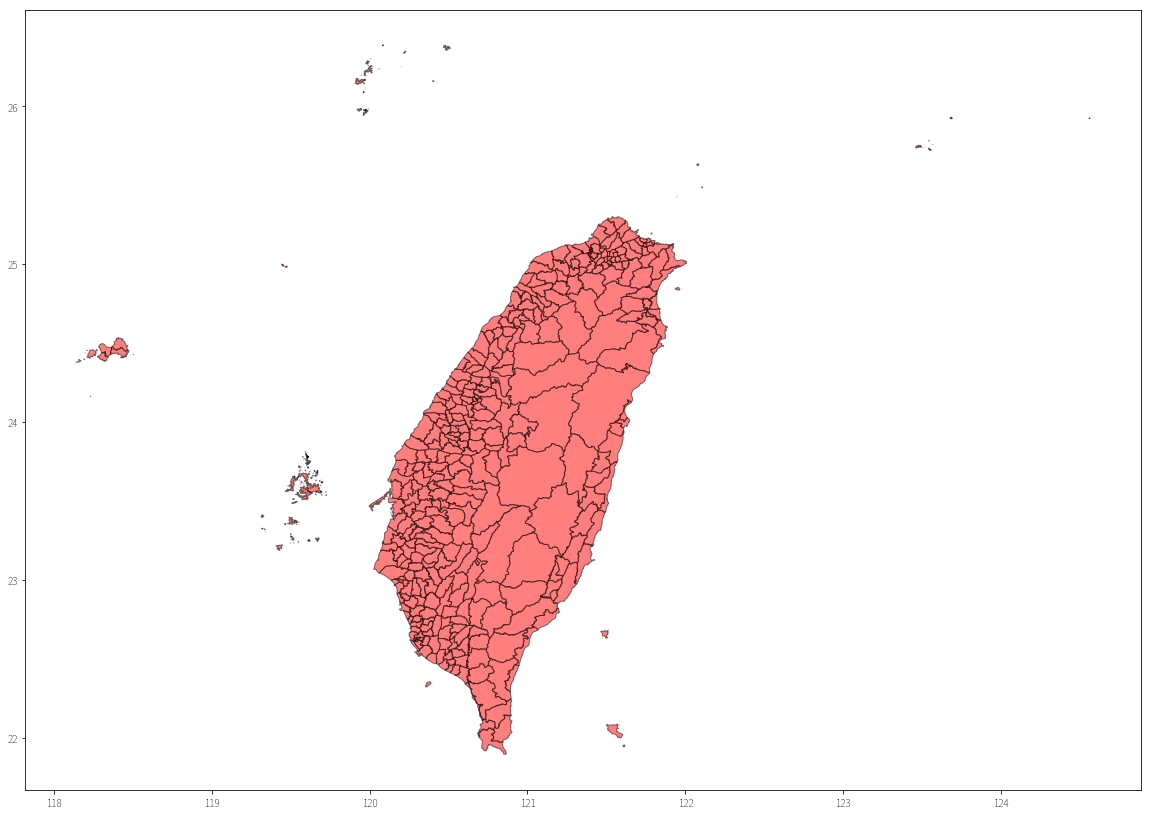

In [15]:
df3.plot(figsize = (20,20),color = 'r',edgecolor = 'K',alpha = 0.5)

In [16]:
df3.isnull().any()

COUNTYNAME    False
TOWNNAME      False
geometry      False
博士畢            True
碩士畢            True
大學畢            True
二專畢            True
後二專畢           True
高中畢            True
高職畢            True
國中畢            True
國小畢            True
不識字            True
dtype: bool

In [17]:
df3 = df3.fillna(0)

In [18]:
df3.isnull().any()

COUNTYNAME    False
TOWNNAME      False
geometry      False
博士畢           False
碩士畢           False
大學畢           False
二專畢           False
後二專畢          False
高中畢           False
高職畢           False
國中畢           False
國小畢           False
不識字           False
dtype: bool

## 全部合起來跑看看


### 補充
[Colormap](https://matplotlib.org/tutorials/colors/colormaps.html)

#### 設計函數時，要分清楚甚麼是`global`以及`local`的數據
#### interact套件中，series會變成滑桿，list資料會變成下拉式選單，boolean會變成打勾勾的checkbox

In [19]:
TW = gpd.read_file('台灣TWD97鄉鎮市\TOWN_MOI_1071226.shp',encoding = 'utf-8')

df = pd.read_excel('村里學歷人數改.xlsx',encoding = 'utf-8')
colnames = df.loc[0].values
df = df[2:]
df.columns = colnames
df.index = range(1,7760)

df2 = df.groupby(by=['COUNTYNAME','TOWNNAME']).sum()

df2.drop(['統計年','區域別代碼','區域別','村里名稱'],axis = 1,inplace = True)
df2.reset_index(inplace=True)

df3 = pd.merge(TW, df2,how='left')
df3.drop(['TOWNID','TOWNCODE','TOWNENG','COUNTYID','COUNTYCODE'],axis = 1,inplace = True)
df3 = df3.fillna(0)

edu = pd.DataFrame(df3.loc[:,'博士畢':'不識字'])
#選出純數據的部分

def ShowMeTheTown(town='信義區'):
    
    display(df3.loc[df3['TOWNNAME']==town])
    edu.loc[df3['TOWNNAME']==town].plot.bar(figsize = (10,10),colormap='Spectral')
    plt.plot(title = df3['TOWNNAME']==town+'學歷分布圖')
    plt.legend(loc = "best")
    plt.xlabel(str(town),fontsize=15)
    plt.ylabel("人數(人)",fontsize=15)
    plt.title(str(town)+'學歷統計圖',fontsize=25)
    
def ShowMeTheCounty(County='臺北市'):
    filter1=df3.drop(df3[df3.COUNTYNAME!=County].index)
    filter1.loc[filter1['COUNTYNAME']==County].plot(figsize = (10,10),cmap='Spectral')
    town_name = filter1['TOWNNAME'].tolist()
    interact(ShowMeTheTown,town=town_name)

interact(ShowMeTheCounty,County =['南投縣', '嘉義市', '嘉義縣', '基隆市', '宜蘭縣', '屏東縣', '彰化縣', '新北市', '新竹市', '新竹縣','桃園市', '澎湖縣', '臺中市', '臺北市', '臺南市', '臺東縣', '花蓮縣', '苗栗縣', '連江縣', '金門縣','雲林縣', '高雄市'])

interactive(children=(Dropdown(description='County', index=13, options=('南投縣', '嘉義市', '嘉義縣', '基隆市', '宜蘭縣', '屏東…

<function __main__.ShowMeTheCounty(County='臺北市')>

### 其他小東西

1. 怎麼選出縣市名

2. 在圖表上顯示數字，但因為尺寸問題會導致無法顯示圖表，因此作罷，但理論上是有辦法顯示數字的

3. 嘗試怎麼只顯示該縣市各區的資料

In [20]:
df87 = df3.groupby("COUNTYNAME")
real = df87.size()
real.index

Index(['南投縣', '嘉義市', '嘉義縣', '基隆市', '宜蘭縣', '屏東縣', '彰化縣', '新北市', '新竹市', '新竹縣',
       '桃園市', '澎湖縣', '臺中市', '臺北市', '臺南市', '臺東縣', '花蓮縣', '苗栗縣', '連江縣', '金門縣',
       '雲林縣', '高雄市'],
      dtype='object', name='COUNTYNAME')

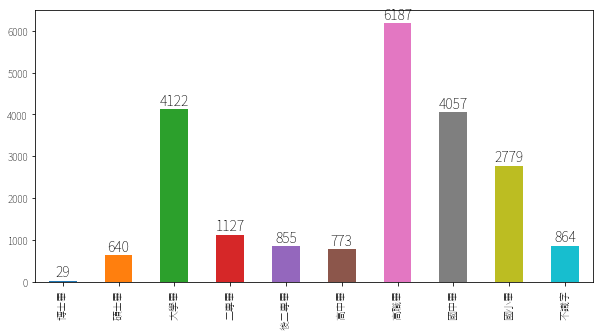

In [21]:
edu = pd.DataFrame(df3.loc[:,'博士畢':'不識字'])
x = edu.index
edu.loc[200].plot.bar(figsize = (10,5))
for a,b in zip(x,edu.loc[200]):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=14)


In [22]:
df3.drop(df3[df3.COUNTYNAME!='臺北市'].index)

COUNTYNAME TOWNNAME                                           geometry  \
152        臺北市      大安區  POLYGON ((121.543841724 25.04490669700004, 121...   
153        臺北市      文山區  POLYGON ((121.5972524900001 25.01438526800007,...   
341        臺北市      信義區  POLYGON ((121.579950627 25.04950413500006, 121...   
342        臺北市      萬華區  POLYGON ((121.5052060700001 25.04949036400006,...   
343        臺北市      中正區  POLYGON ((121.5134137450001 25.04939843500006,...   
344        臺北市      南港區  POLYGON ((121.614250201 25.06451252200009, 121...   
345        臺北市      松山區  POLYGON ((121.5697062800001 25.07629222800006,...   
346        臺北市      大同區  POLYGON ((121.5141047090001 25.07941577800005,...   
347        臺北市      中山區  POLYGON ((121.5414663030001 25.09287088400004,...   
348        臺北市      內湖區  POLYGON ((121.5935900530001 25.11514551600004,...   
349        臺北市      士林區  POLYGON ((121.580883371 25.19535329300004, 121...   
350        臺北市      北投區  POLYGON ((121.559902986 25.21014324000004, 121...   

        博士畢      碩士畢      大學畢      二專畢     後二專畢      高中畢      高職畢      國中畢  \
152  5840.0  37398.0  91050.0  14417.0  15593.0  16605.0  21112.0   9052.0   
153  3280.0  24845.0  68570.0  15473.0  13294.0  14073.0  27177.0  11818.0   
341  1771.0  19089.0  58500.0  12385.0  12204.0  13706.0  21809.0  10540.0   
342   914.0   9837.0  37495.0   9627.0   8651.0  12800.0  24412.0  15336.0   
343  2387.0  17045.0  41909.0   7746.0   7669.0   8169.0  12830.0   6197.0   
344  1000.0   8362.0  27330.0   6836.0   5703.0   6178.0  14376.0   6853.0   
345  2070.0  20529.0  59315.0  10913.0  11702.0  11065.0  17335.0   6802.0   
346   685.0   7615.0  27533.0   6668.0   6377.0   8555.0  15288.0   7871.0   
347  1961.0  19533.0  60632.0  11548.0  13205.0  14616.0  23552.0  11009.0   
348  1873.0  23352.0  74371.0  15275.0  16492.0  14634.0  29468.0  12319.0   
349  2183.0  20466.0  68125.0  15120.0  14341.0  16982.0  31164.0  16108.0   
350  2042.0  17536.0  59243.0  13342.0  12955.0  13460.0  28770.0  14811.0   

         國小畢     不識字  
152   9198.0   641.0  
153  13329.0  1137.0  
341  12481.0   861.0  
342  17485.0  1389.0  
343   6033.0   546.0  
344   8967.0   703.0  
345   7382.0   424.0  
346   9262.0   562.0  
347  11612.0   642.0  
348  13980.0   959.0  
349  20725.0  1285.0  
350  17515.0  1272.0